<a href="https://colab.research.google.com/github/ArturoV4/WordCloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalar librerías**

In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install numpy
!pip install pandas
!pip install pillow
!pip install wordcloud
!pip install matplotlib

**Código**

Escriba el ID del usuario: 3610


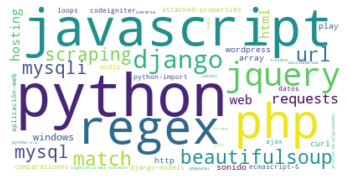

In [168]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
% matplotlib inline

usuario = input("Escriba el ID del usuario: ")

url = "https://es.stackoverflow.com/users/" +usuario+ "?tab=tags"

res = requests.get(url)
soup = bs(res.content)

etiqueta = soup.find_all('a', class_= 'post-tag')
frecuencia = soup.find_all('div', class_= 'answer-votes')

text = list()
frecu = list()
for i in etiqueta:
  text.append(i.text)

text.pop(0)

for i in frecuencia:
  freq = str(i.text)
  if(int(freq)>=0):
    if(int(freq)==0):
      freq=str("1")
    frecu.append(int(freq))

diccionario = dict(zip(text,frecu))

wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate_from_frequencies(diccionario)
# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()